# Testing DeepSeek's ability to generate data sets

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import math

In [16]:
dsDF = pd.read_csv("../LLM_Generated/DeepSeek/10Countries.csv")
compDF = pd.read_csv("../completeDatasets/pricesComplete.csv")

In [17]:
# dsDF.info()
# compDF.info()

for col in ["acceptanceRate", "percOfIntStud"]:
    dsDF[col] = dsDF[col].str.replace('%', '', regex=False).astype(float)

merged_df = dsDF.merge(compDF, on="university", suffixes=("_df1", "_df2"))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   university            88 non-null     object 
 1   ranking_df1           88 non-null     int64  
 2   tuition_df1           88 non-null     int64  
 3   percOfIntStud_df1     88 non-null     float64
 4   acceptanceRate_df1    88 non-null     float64
 5   safetyIndex_df1       88 non-null     int64  
 6   livingCost_df1        88 non-null     int64  
 7   rentCost_df1          88 non-null     int64  
 8   groceriesCost_df1     88 non-null     int64  
 9   recreationCost_df1    88 non-null     int64  
 10  healthcareCost_df1    88 non-null     int64  
 11  transportCost_df1     88 non-null     int64  
 12  link_df1              88 non-null     object 
 13  Computer Science_df1  88 non-null     int64  
 14  Business_df1          88 non-null     int64  
 15  Economics_df1         88 

## Linear regression

In [18]:
regressor = LinearRegression()
r2_scores = {}

## Ranking

Column: ranking
  Slope: 0.8705
  Intercept: 281.9982
  R² Score: 0.5256



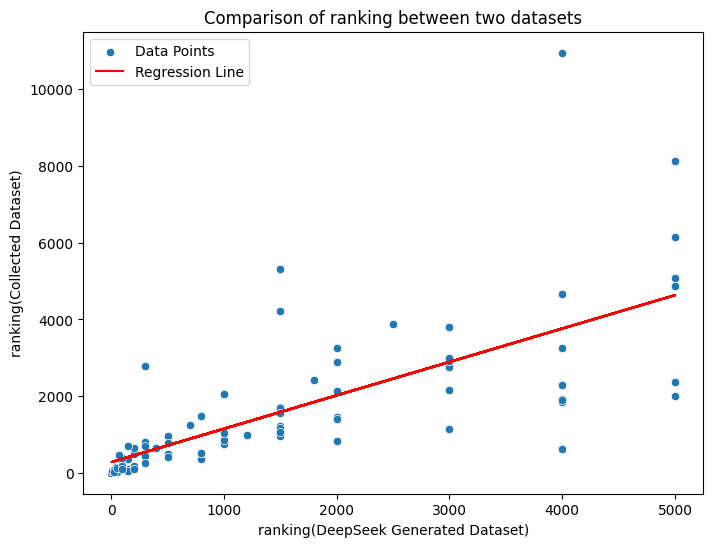

In [19]:
column = "ranking"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Tuition

Column: tuition
  Slope: 0.7316
  Intercept: 2523.5529
  R² Score: 0.5116



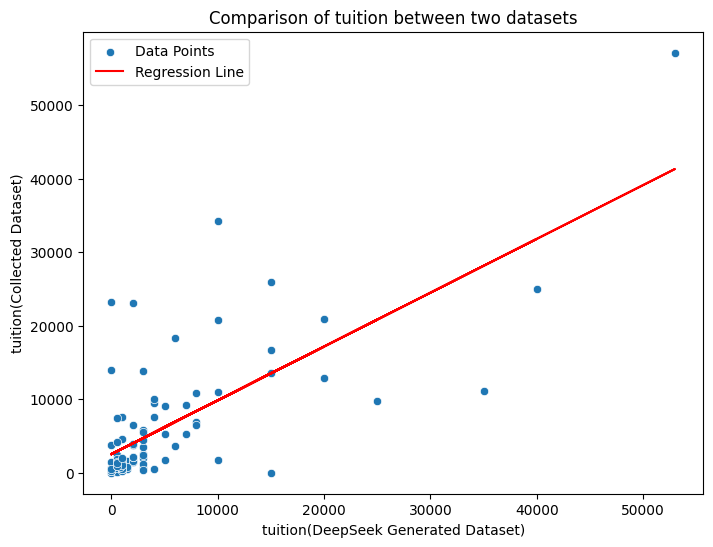

In [20]:
column = "tuition"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Percentage of international students

Column: percOfIntStud
  Slope: 0.6446
  Intercept: 3.1659
  R² Score: 0.4472



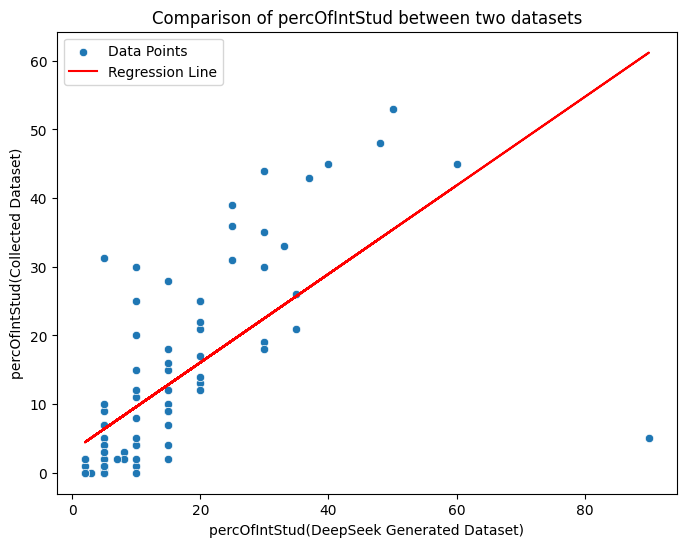

In [21]:
column = "percOfIntStud"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Acceptance rate

Column: acceptanceRate
  Slope: 0.3561
  Intercept: 25.7518
  R² Score: 0.1170



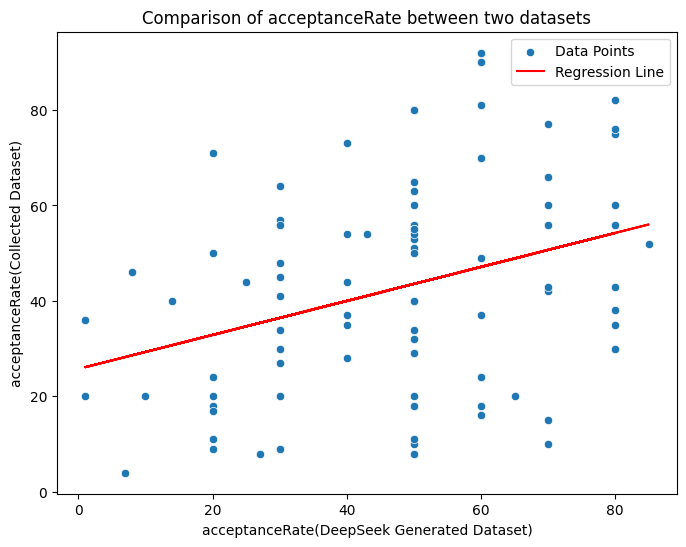

In [22]:
column = "acceptanceRate"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of living

Column: livingCost
  Slope: 0.6107
  Intercept: 332.1214
  R² Score: 0.6507



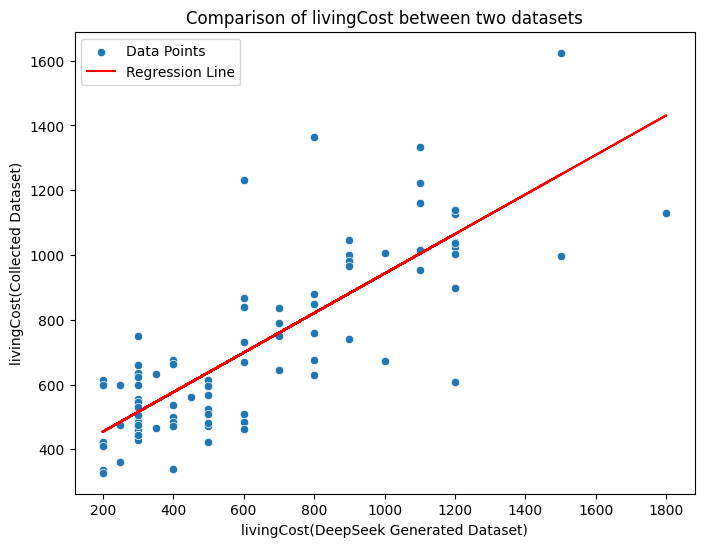

In [23]:
column = "livingCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of rent

Column: rentCost
  Slope: 1.2232
  Intercept: 156.8963
  R² Score: 0.6527



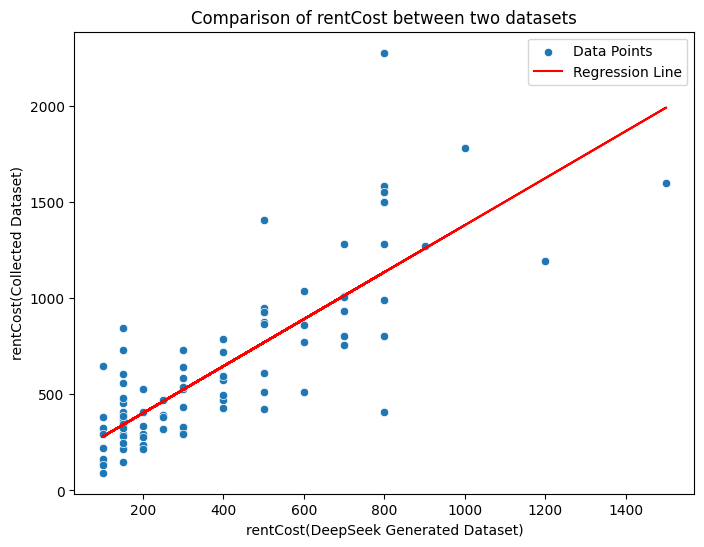

In [24]:
column = "rentCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of groceries

Column: groceriesCost
  Slope: 0.9846
  Intercept: 73.5050
  R² Score: 0.5232



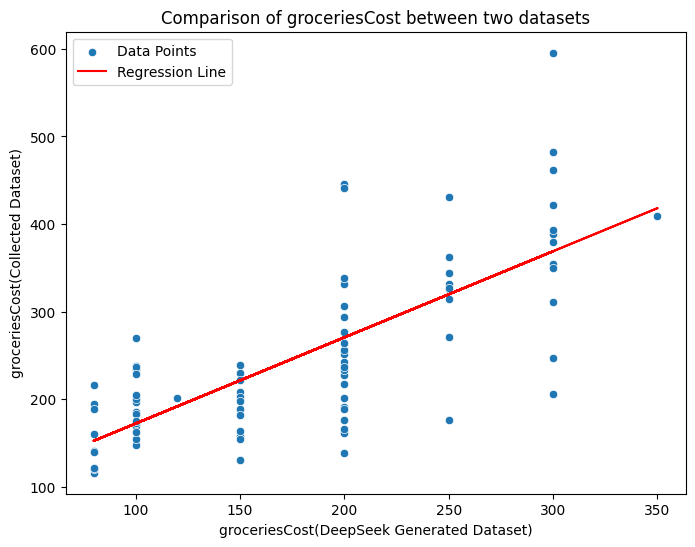

In [25]:
column = "groceriesCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of recreation

Column: recreationCost
  Slope: 0.5174
  Intercept: 20.5250
  R² Score: 0.6636



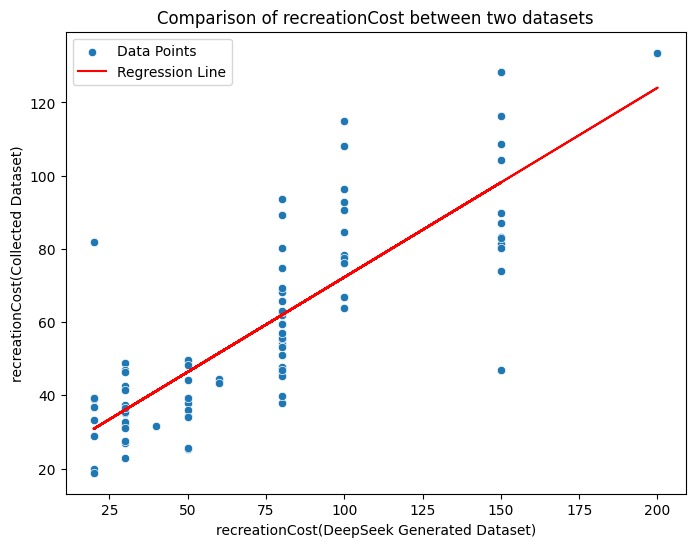

In [26]:
column = "recreationCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Healthcare cost

Column: healthcareCost
  Slope: 1.3090
  Intercept: 159.4279
  R² Score: 0.2633



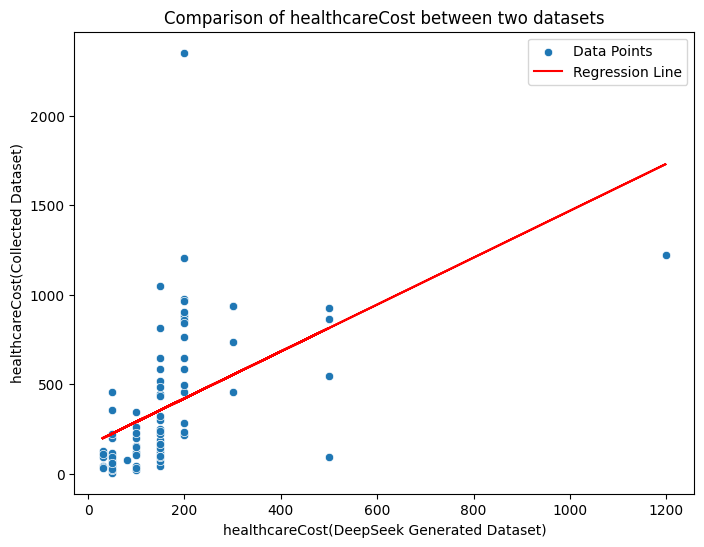

In [27]:
column = "healthcareCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of transportation

Column: transportCost
  Slope: 0.9313
  Intercept: 4.7793
  R² Score: 0.6189



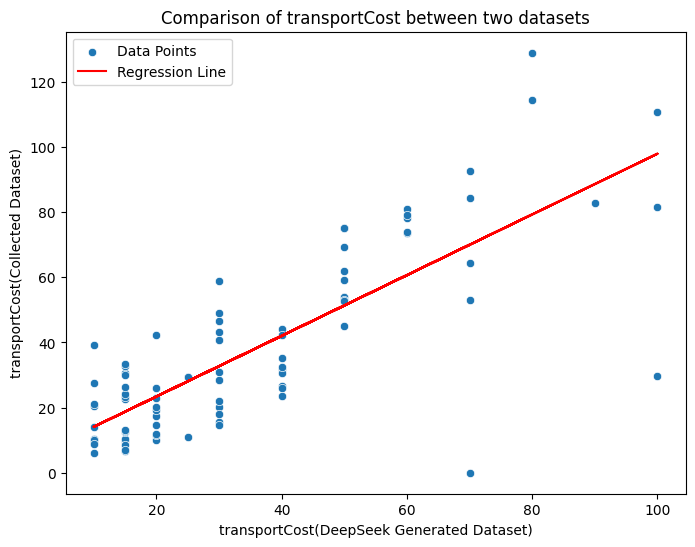

In [28]:
column = "transportCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()